# Project 1

# 데이터 가져오기

In [509]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes=load_diabetes()

In [510]:
diabetes.keys() # 키가 뭐들어 있는 지 확인

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [511]:
diabetes_data = diabetes.data
diabetes_data.shape # feature가 몇 개 들어있는 지 확인

(442, 10)

In [512]:
diabetes_data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [513]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

와 feature가 10개나 있다. 선형회귀를 이용해야겠다.

In [514]:
#시각화 하기

diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [515]:
df_X = diabetes.data
df_y = diabetes.target

# 모델에 입력할 데이터 X준비하기

In [516]:
import numpy as np
df_X = np.array(df_X)
df_X.shape

(442, 10)

# 모델에 예측할 데이터 y준비하기

In [517]:
df_y = np.array(df_y)
df_y.shape

(442,)

# train 데이터와 test데이터로 분리하기

In [518]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


갯수가 알맞게 들어가있다는 것을 알 수 있다.

# 모델 준비하기

In [519]:
# W : 기울기, b : y절편

W = np.random.rand(10) #rand(행, 열), feature이 10개니깐 10으로 설정
b = np.random.rand()

In [520]:
W

array([0.38459344, 0.76186343, 0.42177548, 0.41265332, 0.60581127,
       0.96929507, 0.07294416, 0.10612639, 0.22637884, 0.89757684])

In [521]:
b

0.6743434055206342

In [522]:
def model(X, W, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * W[i] #각 각의 특성을 각 X값에 곱해준다.
  predictions += b # predicctions 맨 마지막에 y절편 값을 더해준다.
  return predictions

# 손실함수 loss정의하기

In [523]:
# 오류를 측정해주는 함수 MSE

def MSE(a, b):
  mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
  return mse

In [524]:
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

# 기울기를 구하는 gradient 함수 구현

In [525]:
def gradient(X, W, b, y):
  N = len(W)
  y_pred = model(X, W, b)
  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db

In [526]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -60.54626103  -13.67241174 -189.56809347 -142.61380419  -68.19537102
  -55.90075514  127.61970745 -138.94722258 -182.85379807 -123.42341575]
db: -302.91828151475056


# 하이퍼 파라미터인 학습률 설정하기

In [527]:
LEARNING_RATE = 0.2

# 모델 학습하기

In [528]:
losses = []

for i in range(1, 1001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0:
    print('lteration %d : Loss %0.4f' % (i, L))

lteration 10 : Loss 3641.2590
lteration 20 : Loss 3224.2638
lteration 30 : Loss 3064.4487
lteration 40 : Loss 2987.0466
lteration 50 : Loss 2947.2483
lteration 60 : Loss 2926.0970
lteration 70 : Loss 2914.5004
lteration 80 : Loss 2907.9305
lteration 90 : Loss 2904.0754
lteration 100 : Loss 2901.7263
lteration 110 : Loss 2900.2353
lteration 120 : Loss 2899.2462
lteration 130 : Loss 2898.5583
lteration 140 : Loss 2898.0554
lteration 150 : Loss 2897.6686
lteration 160 : Loss 2897.3562
lteration 170 : Loss 2897.0923
lteration 180 : Loss 2896.8605
lteration 190 : Loss 2896.6504
lteration 200 : Loss 2896.4551
lteration 210 : Loss 2896.2700
lteration 220 : Loss 2896.0923
lteration 230 : Loss 2895.9198
lteration 240 : Loss 2895.7513
lteration 250 : Loss 2895.5858
lteration 260 : Loss 2895.4226
lteration 270 : Loss 2895.2614
lteration 280 : Loss 2895.1017
lteration 290 : Loss 2894.9435
lteration 300 : Loss 2894.7866
lteration 310 : Loss 2894.6309
lteration 320 : Loss 2894.4762
lteration 330 : L

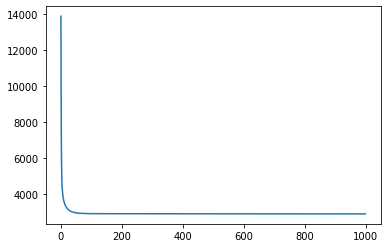

In [529]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [530]:
W, b

(array([  41.50294868, -240.57401287,  554.9363194 ,  343.70389456,
        -284.82560841,   11.42596596, -127.458901  ,  184.8018003 ,
         488.76026328,   53.29228179]), 151.31261581572718)

# test데이터에 대한 성능 확인하기

In [531]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.20897400658

# 정답 데이터와 예측한 데이터 시각화하기

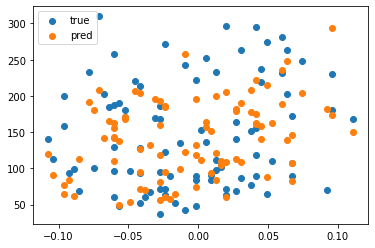

In [532]:
plt.scatter(X_test[:,0], y_test, label="true")
plt.scatter(X_test[:,0], prediction, label="pred")
plt.legend()
plt.show()

# Project 2

# 데이터 가져오기

In [533]:
from sklearn.datasets import load_diabetes
import pandas as pd

train = pd.read_csv('/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [534]:
# https://jimmy-ai.tistory.com/156 참조

In [535]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

type이 object라는 것을 알 수 있다. datetime은 시간 형식이기 때문에, 숫자형으로 바꿔줘야 한다.

In [536]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [537]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

object 자료형을 datetime으로 바꿔줬다.

더 자세하게 자료형을 알아보자. 과연, 우리가 변하게 해주고 싶은 연월일시간분초 정보가 다 들어가있을까?

In [538]:
train['datetime'].dt.year # dt.year이 하나의 명령어

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [539]:
train['datetime'].dt.month # 월

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [540]:
train['datetime'].dt.day  # 일

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [541]:
train['datetime'].dt.hour # 시

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

In [542]:
train['datetime'].dt.minute # 분

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [543]:
train['datetime'].dt.second # 초

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [544]:
# column 생성

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [545]:
train.head() # 잘 생성되었는 지 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# year, month, day, hour, minute, second 데이터 개수 시각화하기

In [546]:
import seaborn as sns
import matplotlib.pyplot

In [547]:
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는 지 표시할 수 있다.
# countplot(x="columnn_name", data=dataframe)

# matplotlib.pyplot 모듈의 subplot() 함수는 여러 개의 그래프를 하나의 그림에 나타내도록 한다.
# plt.subplot(row, column, index)

#참조 https://www.tutorialspoint.com/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn-using-matplotlib

subplot()

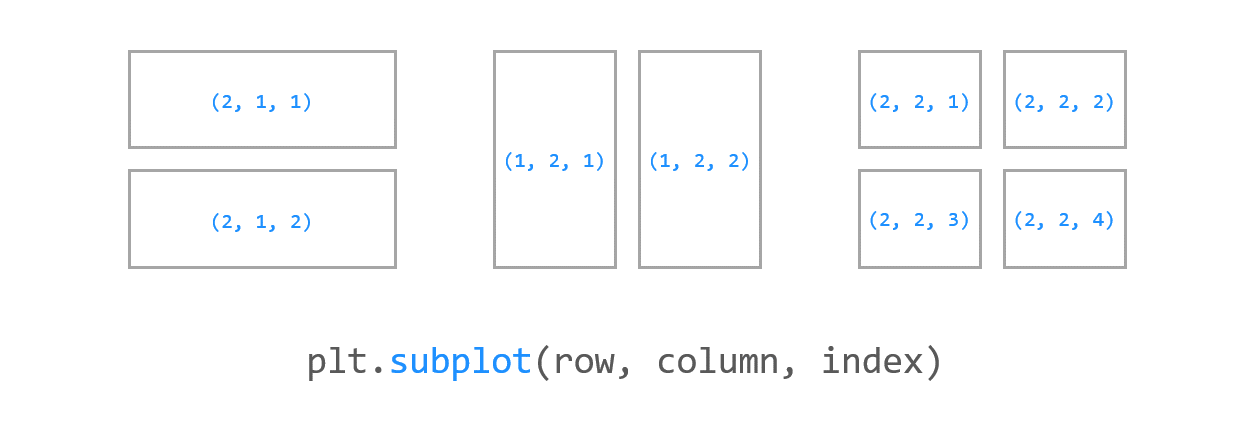

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


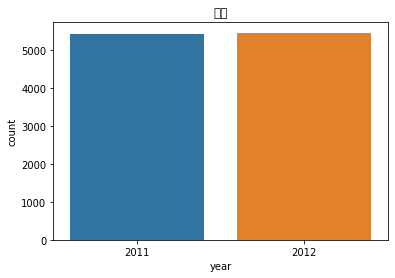

In [548]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "year", data = train)
plt.title('연도')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


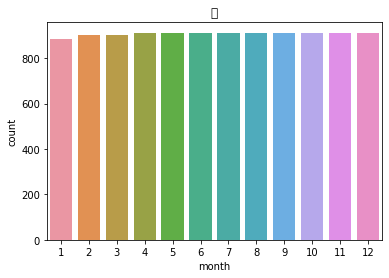

In [549]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "month", data = train)
plt.title('월')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


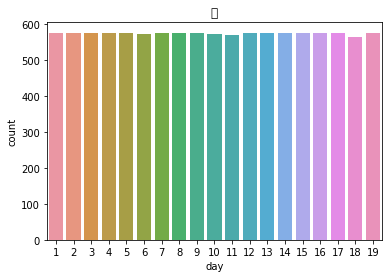

In [550]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "day", data = train)
plt.title('일')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


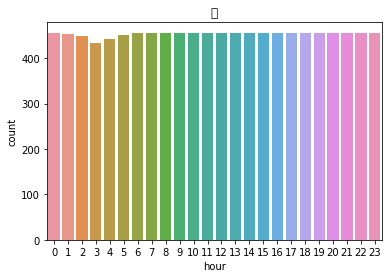

In [551]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "hour", data = train)
plt.title('시')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


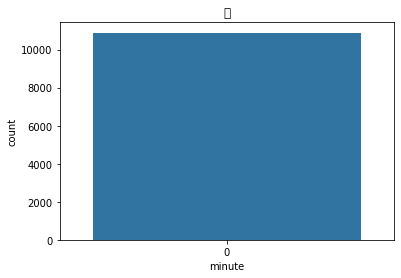

In [552]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "minute", data = train)
plt.title('분')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0, flags=flags)


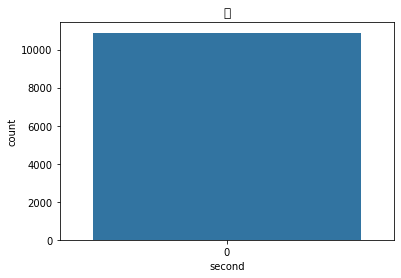

In [553]:
# subplot 안 쓰고 하나씩 만들어보기

sns.countplot(x= "second", data = train)
plt.title('초')
plt.show()

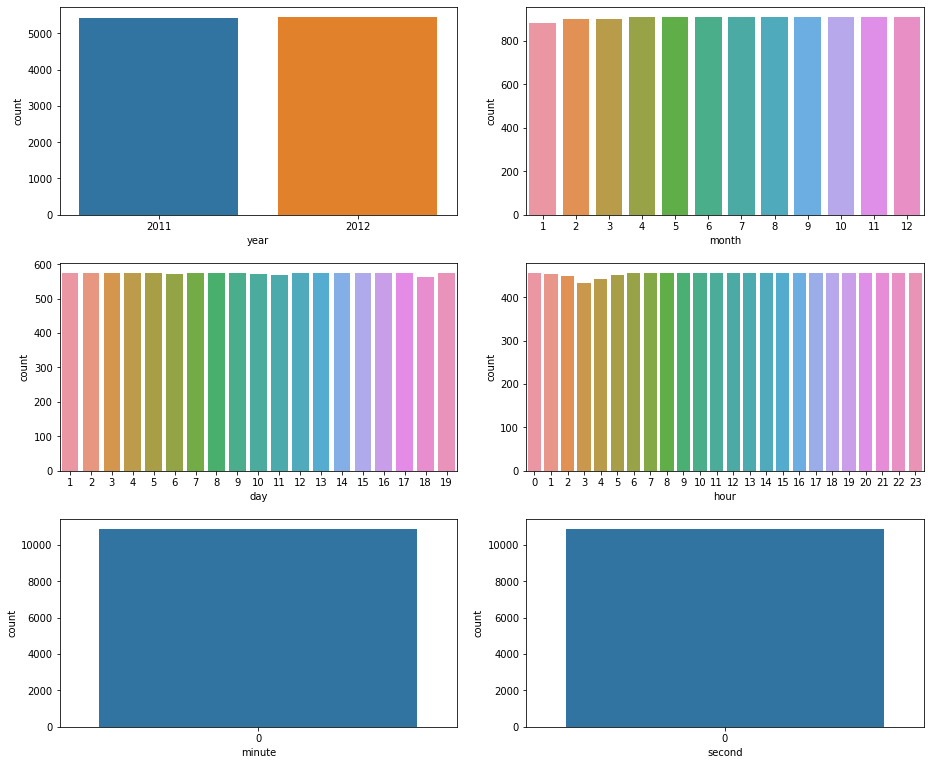

In [554]:
fig, ax = plt.subplots(3,2, figsize = (12, 10))           # figsize = 그래프 크기
sns.countplot(data = train, x = "year", ax = ax[0,0])
sns.countplot(data = train, x = "month", ax = ax[0,1])
sns.countplot(data = train, x = "day", ax = ax[1,0])
sns.countplot(data = train, x = "hour", ax = ax[1,1])
sns.countplot(data = train, x = "minute", ax = ax[2,0])
sns.countplot(data = train, x = "second", ax = ax[2,1])

fig.tight_layout()
plt.subplots_adjust(left=4, bottom=4, right=5, top=5)

# subplots_adjust(left, bottom, right, top, wspace, hspace)
# 그래프들 간격 사이 조정

# X, y 컬럼 선택 및 train/test 데이터 분리

In [555]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


자전거는 날씨가 좋은 날 많이 탄다.

그래서,

season, weather, windspeed, month, hour의 영향을 많이 받는다.

그리고 쉬는 날 많이 탄다.

workingday, holiday를 통해 확인해보겠다

# X, y 컬럼 선택 및 train/test 데이터 분리

In [556]:
train = train[['datetime',	'season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count',	'year',	'month',	'day',	'hour',	'minute',	'second']]

In [557]:
X = train[['season', 'weather', 'windspeed', 'month', 'hour', 'workingday','holiday', 'temp', 'humidity']].values
y = train['count'].values

In [578]:
X.shape, y.shape

((10886, 9), (10886,))

In [558]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 9) (8708,)
(2178, 9) (2178,)


# LinearRegression 모델 학습

In [559]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [560]:
model.fit(X_train, y_train)

LinearRegression()

# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [561]:
predictions = model.predict(X_test)
predictions

array([285.57644836,   4.52618023, 245.8649291 , ..., 267.6451673 ,
        -5.18173996, 202.29629079])

In [562]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

21675.754760414027

In [579]:
# rmse

RMSE = mse ** 0.5
RMSE

147.22688192179453

# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


In [ ]:
# 참고 https://jimmy-ai.tistory.com/37 

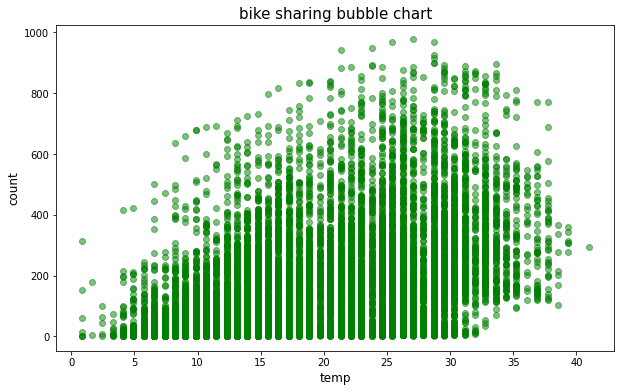

In [576]:
plt.figure(figsize=(10,6))

plt.scatter(train['temp'], # x축
            train['count'], # y축
            c = 'green', # 색깔(고정)
            alpha = 0.5) # 투명도

plt.xlabel('temp', size = 12)
plt.ylabel('count', size = 12)
plt.title('bike sharing bubble chart', size = 15)
plt.show()

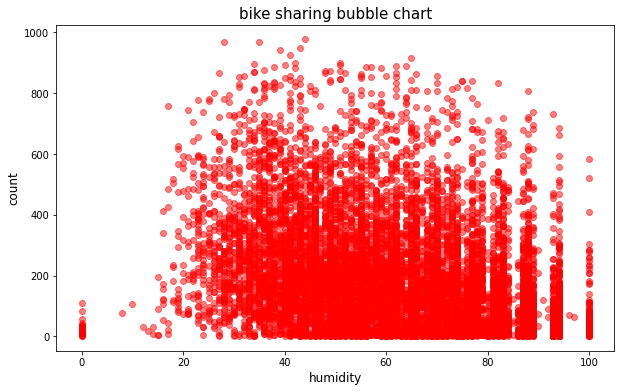

In [577]:
plt.figure(figsize=(10,6))

plt.scatter(train['humidity'], # x축
            train['count'], # y축
            c = 'red', # 색깔(고정)
            alpha = 0.5) # 투명도

plt.xlabel('humidity', size = 12)
plt.ylabel('count', size = 12)
plt.title('bike sharing bubble chart', size = 15)
plt.show()

# 회고

당뇨수치

노드에서 배운 함수를 이용해서 프로젝트를 완성해나갔다. 다음부터는 라이브러리에 지정 되어 있는 함수를 쓴다는 생각에 이걸 왜 구현하는 함수를 직접 만들어내야 되는 지 불평을 했다. 하지만 프로젝트를 완성하는 무렵 생각이 역전됐다. 확실한 이해를 바탕으로 함수에 접근하니 실 사용 때도 도움이 많으 될 거 같다.


하이퍼 파라미터에서 애를 먹었다. 처음, 0.0001의 숫자를 넣었을 때, 그래프는 정말 어처구니 없었다. 아무 패턴이 없는 train 값에 일정한 패턴이 있는 test 값... 틀린 데이터 설정임을 직감했다. 그래서 최적의 수치를 찾기 위해 여러 차례 시도했다. 그리고 내가 찾은 최고의 수는 0.2이었다. mse 오류 값도 예상 보다 낮게 나오고, 무엇보다 시각적으로 보이는 손실함수 그래프가 이뻤다. 또한, 정답 데이터 점에 예측 데이터 점이 가까워 있는 모습이 희열감을 준다.

자전거

캐글필사랑 같은 내용을 다루고 있는 거라, 만만하게 봤다. 필사는 주말에 끝냈기 때문에, 모든 것을 완벽하게 이해했다고 생각했다. 하지만, 달랐다 ㅠㅠ 혼자 데이터 셋을 구상하고, 코드로 구현하려고 하니 만만치 않았다. 

특히, train-test split를 함수 사용 없이, 구현하려다 피봤다. 데이터 셋 갯수가 맞지 않아, 계속 오류가 났다.컬럼을 지워 보기도 하고, 임의적으로 숫자를 조절해봤지만 결국 숫자는 통일되지 않앗다. 노드에서 가르쳐준 것이 아닌, 나만의 방식으로 더 좋은 코드를 가지고 오기 위해 노력했지만 실패했다. 다음에 기회가 된다면 다시 수정해보고 싶다.
그래도 교훈은 있다. 잘 만들어진 라이브러리는 'God'이다. 

이번 exploration은 혼자 다양한 그래프를 구사해볼 수 있는 좋은 기회였다. 시각화를 많이 하니, 약간의 딥러닝 고수가 된 거 같다. 좋은 기회였고, 더 좋은 개발자가 되고 싶다고 다짐한다.
